# Winino market analysis

Questions 

- We want to highlight 10 wines to increase our sales. Which ones should we choose and why?
- We have a limited marketing budget for this year. Which country should we prioritise and why?
- We would like to give awards to the best wineries. Come up with 3 relevant ones. Which wineries should we choose and  why?
- We detected that a big cluster of customers likes a specific combination of tastes. We identified a few keywords that match these tastes: coffee, toast, green apple, cream, and citrus (note that these keywords are case sensitive ⚠️). We - would like you to find all the wines that are related to these keywords. Check that at least 10 users confirm those keywords, to ensure the accuracy of the selection. Additionally, identify an appropriate group name for this cluster.
- We would like to select wines that are easy to find all over the world. Find the top 3 most common grapes all over the world and for each grape, give us the the 5 best rated wines.
- We would like to create a country leaderboard. Come up with a visual that shows the average wine rating for each country. Do the same for the vintages.
- One of our VIP clients likes Cabernet Sauvignon and would like our top 5 recommendations. Which wines would you recommend to him?

Other insights also welcomed

In [1]:
import sqlite3
import pandas as pd

connexion = sqlite3.connect("./db/vivino.db")
cursor = connexion.cursor()

In [8]:
query = f'''
SELECT * FROM wines
INNER JOIN vintages ON wines.id = vintages.wine_id
WHERE wines.ratings_count >= 1000
ORDER BY ratings_average DESC


'''


df = pd.read_sql_query (query, connexion)
df.head(n=10)
# cursor.execute(query)
# cursor.fetchall()

,id,name,is_natural,region_id,winery_id,ratings_average,ratings_count,url,acidity,fizziness,...,id,name,wine_id,ratings_average,ratings_count,year,price_euros,price_discounted_from,price_discount_percentage,bottle_volume_ml
0,1611255,Cabernet Sauvignon,0,105,14919,4.8,2941,https://www.seulementproduitsitaliens.be/spec_...,3.304091,NaN,...,14187320,Scarecrow Cabernet Sauvignon 2015,1611255,4.8,243,2015,1558.75,NaN,NaN,750
1,66294,Special Selection Cabernet Sauvignon,0,25,1301,4.7,41236,https://www.seulementproduitsitaliens.be/spec_...,3.309514,NaN,...,91796,Caymus Special Selection Cabernet Sauvignon 1997,66294,4.6,299,1997,397.50,NaN,NaN,750
2,79635,Clos du Mesnil,0,409,1337,4.7,2471,https://www.seulementproduitsitaliens.be/spec_...,4.546456,4.223847,...,98282,Krug Clos du Mesnil 1990,79635,4.7,147,1990,5017.50,NaN,NaN,750
3,79633,Collection,0,409,1337,4.7,2184,https://www.seulementproduitsitaliens.be/spec_...,4.542271,4.393909,...,98452,Krug Collection 1990,79633,4.7,207,1990,2455.00,NaN,NaN,750
4,83920,Romanée-Saint-Vivant Grand Cru (Marey-Monge),0,2229,11610,4.7,6597,https://www.seulementproduitsitaliens.be/spec_...,4.108734,NaN,...,101629,Domaine de La Romanée-Conti Romanée-Saint-Viva...,83920,4.6,106,1993,8463.75,NaN,NaN,750
5,82199,Barolo Riserva Monfortino,0,504,11472,4.7,5013,https://www.seulementproduitsitaliens.be/spec_...,4.513654,NaN,...,103259,Giacomo Conterno Barolo Riserva Monfortino 1998,82199,4.7,128,1998,2747.50,NaN,NaN,750
6,87552,Châteauneuf-du-Pape,0,401,1523,4.7,7544,https://www.seulementproduitsitaliens.be/spec_...,3.097061,NaN,...,105812,Château Rayas Châteauneuf-du-Pape 2006,87552,4.7,869,2006,3308.75,NaN,NaN,750
7,89750,Amarone della Valpolicella Monte Lodoletta,0,1804,1852,4.7,7947,https://www.seulementproduitsitaliens.be/spec_...,2.235851,NaN,...,108888,Dal Forno Romano Amarone della Valpolicella Mo...,89750,4.7,355,2003,683.75,NaN,NaN,750
8,89750,Amarone della Valpolicella Monte Lodoletta,0,1804,1852,4.7,7947,https://www.seulementproduitsitaliens.be/spec_...,2.235851,NaN,...,115657,Dal Forno Romano Amarone della Valpolicella Mo...,89750,4.7,266,2001,795.00,NaN,NaN,750
9,89750,Amarone della Valpolicella Monte Lodoletta,0,1804,1852,4.7,7947,https://www.seulementproduitsitaliens.be/spec_...,2.235851,NaN,...,115658,Dal Forno Romano Amarone della Valpolicella Mo...,89750,4.7,217,2002,786.25,NaN,NaN,750


The wines above are the highest rated wines with a minimum of 1000 ratings. These can be considered quiet popular wines. Paired with high user ratings will make a good top 10

What about countries?

/Users/ibex/miniconda3/envs/python_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ibex/miniconda3/envs/python_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ibex/miniconda3/envs/python_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'États-Unis'),
  Text(1, 0, 'Suisse'),
  Text(2, 0, 'Roumanie'),
  Text(3, 0, 'Portugal'),
  Text(4, 0, 'Israël'),
  Text(5, 0, 'Espagne'),
  Text(6, 0, 'Argentine'),
  Text(7, 0, 'Italie'),
  Text(8, 0, 'Allemagne'),
  Text(9, 0, 'France')])

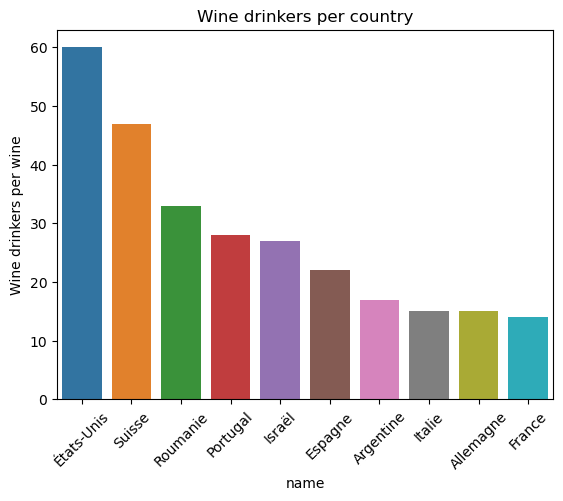

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
# rename axes labels

query_countries = f'''
SELECT name, users_count, wines_count, (users_count / wines_count) AS difference_user_wine 
FROM countries
ORDER BY difference_user_wine DESC
LIMIT 10
'''


df_countries = pd.read_sql_query (query_countries, connexion)
sns.barplot(data=df_countries, x="name",y="difference_user_wine")

# Adjust layout to make room for the table:
plt.ylabel("Wine drinkers per wine")
plt.title('Wine drinkers per country')
plt.xticks(rotation=45)


In [2]:
# Using matplotlib here - same graph as above

import numpy as np
fig, ax = plt.subplots()

# Generate a color map

ax.bar(df_countries['name'], df_countries['difference_user_wine'])
ax.set_ylabel('Wine drinkers per wine')
ax.set_title('Wine drinkers in the world TOP 10')
ax.legend(title='Fruit color')

plt.show()

NameError: name 'plt' is not defined

### Which country to prioritize?

USA and Swistzerland seem to have the highest ratio of wine drinkers to wines produced. These would be potential countries to target with a broader selection of wines.

--------

### Flavour profiles 
Let's now focus on something more interesting: flavour profiles. How do flavour profiles differ between countries? And do we know what kind of flavour profile a country/region prefers and does that match to what they produce??

In [71]:
query = f'''
SELECT DISTINCT COUNT(vintages.name) FROM vintages
INNER JOIN wines ON vintages.wine_id = wines.id
'''




,COUNT(vintages.name)
0,2050


In [39]:
query_taste = f'''
SELECT * FROM wines
INNER JOIN keywords_wine ON wines.id = keywords_wine.wine_id
INNER JOIN keywords ON keywords_wine.keyword_id = keywords.id
'''

df_taste = pd.read_sql_query (query_taste, connexion)
df_taste.head(n=10)

,id,name,is_natural,region_id,winery_id,ratings_average,ratings_count,url,acidity,fizziness,...,sweetness,tannin,user_structure_count,keyword_id,wine_id,group_name,keyword_type,count,id,name
0,82698,Brunello di Montalcino Riserva,0,1796,11500,4.6,3375,https://www.seulementproduitsitaliens.be/spec_...,3.830859,NaN,...,1.650779,3.602499,173.0,242,82698,earth,primary,73,242,leather
1,82698,Brunello di Montalcino Riserva,0,1796,11500,4.6,3375,https://www.seulementproduitsitaliens.be/spec_...,3.830859,NaN,...,1.650779,3.602499,173.0,284,82698,earth,primary,46,284,mushroom
2,82698,Brunello di Montalcino Riserva,0,1796,11500,4.6,3375,https://www.seulementproduitsitaliens.be/spec_...,3.830859,NaN,...,1.650779,3.602499,173.0,156,82698,earth,primary,28,156,earthy
3,82698,Brunello di Montalcino Riserva,0,1796,11500,4.6,3375,https://www.seulementproduitsitaliens.be/spec_...,3.830859,NaN,...,1.650779,3.602499,173.0,22,82698,earth,primary,23,22,balsamic
4,82698,Brunello di Montalcino Riserva,0,1796,11500,4.6,3375,https://www.seulementproduitsitaliens.be/spec_...,3.830859,NaN,...,1.650779,3.602499,173.0,384,82698,earth,primary,21,384,smoke
5,82698,Brunello di Montalcino Riserva,0,1796,11500,4.6,3375,https://www.seulementproduitsitaliens.be/spec_...,3.830859,NaN,...,1.650779,3.602499,173.0,430,82698,earth,primary,16,430,truffle
6,82698,Brunello di Montalcino Riserva,0,1796,11500,4.6,3375,https://www.seulementproduitsitaliens.be/spec_...,3.830859,NaN,...,1.650779,3.602499,173.0,165,82698,earth,primary,12,165,forest floor
7,82698,Brunello di Montalcino Riserva,0,1796,11500,4.6,3375,https://www.seulementproduitsitaliens.be/spec_...,3.830859,NaN,...,1.650779,3.602499,173.0,412,82698,earth,primary,10,412,tar
8,82698,Brunello di Montalcino Riserva,0,1796,11500,4.6,3375,https://www.seulementproduitsitaliens.be/spec_...,3.830859,NaN,...,1.650779,3.602499,173.0,276,82698,earth,primary,9,276,minerals
9,82698,Brunello di Montalcino Riserva,0,1796,11500,4.6,3375,https://www.seulementproduitsitaliens.be/spec_...,3.830859,NaN,...,1.650779,3.602499,173.0,178,82698,earth,primary,7,178,game


In [3]:
query_unique = f'''
SELECT DISTINCT group_name, keyword_type FROM keywords_wine
WHERE keyword_type = "primary"
'''

df_query_unique = pd.read_sql_query (query_unique, connexion)
df_query_unique.head(n=20)

,group_name,keyword_type
0,earth,primary
1,oak,primary
2,red_fruit,primary
3,non_oak,primary
4,spices,primary
5,black_fruit,primary
6,microbio,primary
7,citrus_fruit,primary
8,floral,primary
9,dried_fruit,primary


The following query looks for wines and the corresponding group_name. The group name can be one of 13 main categories for the flavour profile. First I will look at primary flavour profiles based on group_name (flav_cat) and count of the group_name. 

In [34]:
query_taste = f'''
SELECT name, group_name, COUNT(group_name) AS flavour_count FROM wines
INNER JOIN keywords_wine ON wines.id = keywords_wine.wine_id
WHERE keyword_type = "primary"
GROUP BY name, group_name

'''

query_taste_df = pd.read_sql_query (query_taste, connexion)
query_taste_df.head(n=10)

,name,group_name,flavour_count
0,'Giulio Ferrari' Riserva del Fondatore,black_fruit,2
1,'Giulio Ferrari' Riserva del Fondatore,citrus_fruit,12
2,'Giulio Ferrari' Riserva del Fondatore,dried_fruit,2
3,'Giulio Ferrari' Riserva del Fondatore,earth,16
4,'Giulio Ferrari' Riserva del Fondatore,floral,5
5,'Giulio Ferrari' Riserva del Fondatore,microbio,11
6,'Giulio Ferrari' Riserva del Fondatore,non_oak,12
7,'Giulio Ferrari' Riserva del Fondatore,oak,16
8,'Giulio Ferrari' Riserva del Fondatore,red_fruit,7
9,'Giulio Ferrari' Riserva del Fondatore,spices,7


In [43]:
query_taste_df.iloc[0:100,]


,name,group_name,flavour_count
0,'Giulio Ferrari' Riserva del Fondatore,black_fruit,2
1,'Giulio Ferrari' Riserva del Fondatore,citrus_fruit,12
2,'Giulio Ferrari' Riserva del Fondatore,dried_fruit,2
3,'Giulio Ferrari' Riserva del Fondatore,earth,16
4,'Giulio Ferrari' Riserva del Fondatore,floral,5
...,...,...,...
95,5 Puttonyos Aszú (Blue Label),spices,18
96,5 Puttonyos Aszú (Blue Label),tree_fruit,23
97,5 Puttonyos Aszú (Blue Label),tropical_fruit,12
98,5 Puttonyos Aszú (Blue Label),vegetal,7


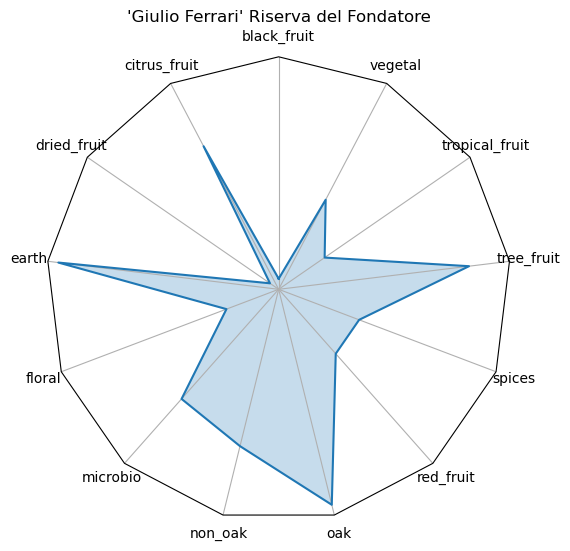

In [71]:
from src.spider_chart import radar_factory
import matplotlib.pyplot as plt

data = query_taste_df[query_taste_df.name == "'Giulio Ferrari' Riserva del Fondatore"]

def spider_plot(df: pd.DataFrame, name: str = 'unknown'):
    data = df[df.name == name]
    spoke_labels = data.group_name
    N = len(data.group_name)
    theta = radar_factory(N, frame='polygon')

    # Initialize figure
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    # Plot the four cases from the example data on separate axes --> from example
    ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
    ax.set_title(name,  position=(0.5, 1.1), ha='center')

    # Insert data
    ax.plot(theta, data.flavour_count)
    ax.fill(theta, data.flavour_count,  alpha=0.25)
    ax.set_varlabels(spoke_labels)
    plt.show()

spider_plot(data, data.name[0])


In [11]:
data = [
    ['Sulfate', 'Nitrate', 'EC', 'OC1', 'OC2', 'OC3', 'OP', 'CO', 'O3'],
    ('Basecase', [
        [0.88, 0.01, 0.03, 0.03, 0.00, 0.06, 0.01, 0.00, 0.00],
        [0.07, 0.95, 0.04, 0.05, 0.00, 0.02, 0.01, 0.00, 0.00],
        [0.01, 0.02, 0.85, 0.19, 0.05, 0.10, 0.00, 0.00, 0.00],
        [0.02, 0.01, 0.07, 0.01, 0.21, 0.12, 0.98, 0.00, 0.00],
        [0.01, 0.01, 0.02, 0.71, 0.74, 0.70, 0.00, 0.00, 0.00]]),
    ('With CO', [
        [0.88, 0.02, 0.02, 0.02, 0.00, 0.05, 0.00, 0.05, 0.00],
        [0.08, 0.94, 0.04, 0.02, 0.00, 0.01, 0.12, 0.04, 0.00],
        [0.01, 0.01, 0.79, 0.10, 0.00, 0.05, 0.00, 0.31, 0.00],
        [0.00, 0.02, 0.03, 0.38, 0.31, 0.31, 0.00, 0.59, 0.00],
        [0.02, 0.02, 0.11, 0.47, 0.69, 0.58, 0.88, 0.00, 0.00]]),
    ('With O3', [
        [0.89, 0.01, 0.07, 0.00, 0.00, 0.05, 0.00, 0.00, 0.03],
        [0.07, 0.95, 0.05, 0.04, 0.00, 0.02, 0.12, 0.00, 0.00],
        [0.01, 0.02, 0.86, 0.27, 0.16, 0.19, 0.00, 0.00, 0.00],
        [0.01, 0.03, 0.00, 0.32, 0.29, 0.27, 0.00, 0.00, 0.95],
        [0.02, 0.00, 0.03, 0.37, 0.56, 0.47, 0.87, 0.00, 0.00]]),
    ('CO & O3', [
        [0.87, 0.01, 0.08, 0.00, 0.00, 0.04, 0.00, 0.00, 0.01],
        [0.09, 0.95, 0.02, 0.03, 0.00, 0.01, 0.13, 0.06, 0.00],
        [0.01, 0.02, 0.71, 0.24, 0.13, 0.16, 0.00, 0.50, 0.00],
        [0.01, 0.03, 0.00, 0.28, 0.24, 0.23, 0.00, 0.44, 0.88],
        [0.02, 0.00, 0.18, 0.45, 0.64, 0.55, 0.86, 0.00, 0.16]])
]

data_df = pd.DataFrame(data)


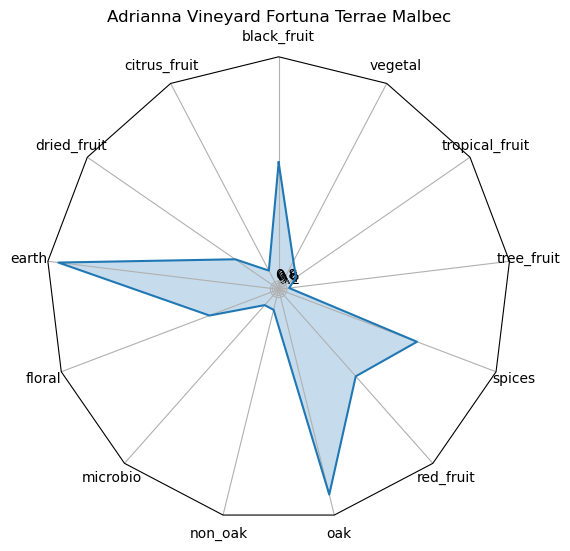

In [72]:
spider_plot(query_taste_df, 'Adrianna Vineyard Fortuna Terrae Malbec')